<a href="https://colab.research.google.com/github/SelvamathanS/Data-Analysis-on-Hotel-Data-and-Decision-Tree/blob/main/Data_Analysis_part_(5_1_26).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
d1 = pd.read_csv("/content/i1.csv")
d2 = pd.read_csv("/content/i2.csv")

# ***Dataset Analysis***

In [ ]:
#merge 2 dataset(d1,d2) into d
d = d1.merge(d2,how='outer')
d

,Date,Timestamp,Invoice No.,Item Name,Price,Qty.,Sub Total,Discount,Tax,Final Total,Table No.,Server Name,Covers,Variation,Category,HSN
0,2023-04-01,2023-04-01 13:16:03,23465,Babycorn Manchurian,160.0,1.0,160.0,0.0,8.00,168.00,20.0,biller,0,NaN,Veg Starters,NaN
1,2023-04-01,2023-04-01 13:16:03,23465,Chicken Kati Roll,120.0,1.0,120.0,0.0,6.00,126.00,20.0,biller,0,NaN,NON VEG STARTERS CHICKEN,NaN
2,2023-04-01,2023-04-01 13:16:03,23465,Paneer Butter Masala,150.0,2.0,300.0,0.0,15.00,315.00,20.0,biller,0,NaN,Veg Gravy,NaN
3,2023-04-01,2023-04-01 13:16:03,23465,Pulka (2 No),40.0,3.0,120.0,0.0,6.00,126.00,20.0,biller,0,NaN,Indian Breads,NaN
4,2023-04-01,2023-04-01 13:16:03,23465,Schewan Chicken Fried Rice,160.0,1.0,160.0,0.0,8.00,168.00,20.0,biller,0,NaN,NON VEG BRIYANI & RICE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15616,2023-09-19,2023-09-19 22:03:44,28389,Kulcha,55.0,1.0,55.0,0.0,2.76,57.76,16.0,biller,0,NaN,Indian Breads,NaN
15617,2023-09-19,2023-09-19 22:03:44,28389,Mineral Water,20.0,2.0,40.0,0.0,2.00,42.00,16.0,biller,0,NaN,Deserts & Mocktails,NaN
15618,2023-09-19,2023-09-19 22:03:44,28389,Mushroom Masala,150.0,1.0,150.0,0.0,7.50,157.50,16.0,biller,0,NaN,Veg Gravy,NaN
15619,2023-09-19,2023-09-19 22:03:44,28389,Paneer Butter Masala,150.0,1.0,150.0,0.0,7.50,157.50,16.0,biller,0,NaN,Veg Gravy,NaN


In [ ]:
#EDA(Exploratory data analysis) -> Info, describe, shape, null values, duplicate values
print(d.shape)
print(d.info())
print(d.describe())
print(d.isna().sum())

(15621, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15621 entries, 0 to 15620
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         15621 non-null  object 
 1   Timestamp    15621 non-null  object 
 2   Invoice No.  15621 non-null  int64  
 3   Item Name    15621 non-null  object 
 4   Price        15621 non-null  float64
 5   Qty.         15621 non-null  float64
 6   Sub Total    15621 non-null  float64
 7   Discount     15621 non-null  float64
 8   Tax          15621 non-null  float64
 9   Final Total  15621 non-null  float64
 10  Table No.    15613 non-null  float64
 11  Server Name  15621 non-null  object 
 12  Covers       15621 non-null  int64  
 13  Variation    15 non-null     object 
 14  Category     15621 non-null  object 
 15  HSN          0 non-null      float64
dtypes: float64(8), int64(2), object(6)
memory usage: 1.9+ MB
None
        Invoice No.         Price          Qty.     Sub 

In [ ]:
#give unique values
d['Invoice No.'].unique()
#give count of unique values
d['Invoice No.'].nunique()

4925

In [ ]:
#total revenue
d['Final Total'].sum()

np.float64(2397010.12)

In [ ]:
#Average purchase value
avg_purchase_value = d['Final Total'].sum() / d['Invoice No.'].nunique()
avg_purchase_value

np.float64(486.70256243654825)

In [ ]:
# group with invoice number
d.groupby('Invoice No.').sum()
invoice_total= d.groupby('Invoice No.')['Final Total'].sum()
print(invoice_total)

Invoice No.
23465    1134.00
23466     441.00
23467     774.88
23468     273.00
23469     462.00
          ...   
28385     493.50
28386    1479.44
28387    1501.50
28388    1928.82
28389     666.76
Name: Final Total, Length: 4925, dtype: float64


In [ ]:
#Finding the invoice number 28327 final total
d.groupby('Invoice No.')['Final Total'].sum().loc[28327]

np.float64(1081.5)

In [ ]:
# Top 3 based on quantity
top_3 = d.groupby('Item Name')['Qty.'].sum().sort_values(ascending=False)[0:3]
top_3

,Qty.
Item Name,
Mineral Water,1672.0
Chicken Biriyani With Raitha And Gravy,1453.0
Butter Naan,1046.0


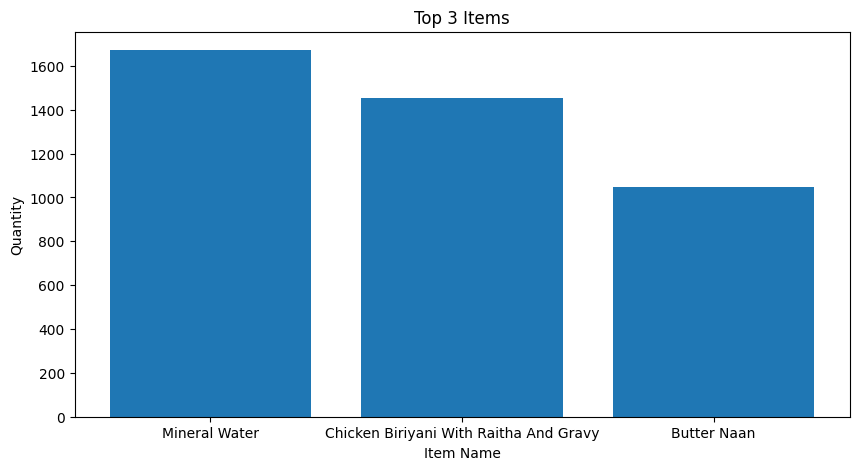

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.bar(top_3.index, top_3.values)
plt.xlabel('Item Name')
plt.ylabel('Quantity')
plt.title('Top 3 Items')
plt.show()

In [ ]:
# Top 3 based on items sold
top_3 = d.groupby('Item Name')['Final Total'].sum().sort_values(ascending=False)[0:3]
top_3

,Final Total
Item Name,
Chicken Biriyani With Raitha And Gravy,240730.96
Chicken Fried Rice,119347.20
Butter Naan,65387.74


In [ ]:
d[d['Date'] == '2023-09-14'].groupby('Invoice No.')['Final Total'].sum().sort_values(ascending=False)[0:3]


,Final Total
Invoice No.,
28215,1492.20
28195,1218.00
28220,1005.52


In [ ]:
# identify the invoices whose bill value is above the overall average bill value
avg= d.groupby('Invoice No.').sum()
a =avg['Final Total'].mean()
invoices_above_average = avg[avg['Final Total'] > a]
invoices_above_average

,Date,Timestamp,Item Name,Price,Qty.,Sub Total,Discount,Tax,Final Total,Table No.,Server Name,Covers,Variation,Category,HSN
Invoice No.,,,,,,,,,,,,,,,
23465,2023-04-012023-04-012023-04-012023-04-012023-0...,2023-04-01 13:16:032023-04-01 13:16:032023-04-...,Babycorn ManchurianChicken Kati RollPaneer But...,810.0,11.0,1080.0,0.0,54.00,1134.00,140.0,billerbillerbillerbillerbillerbillerbiller,0,0,Veg StartersNON VEG STARTERS CHICKENVeg GravyI...,0.0
23467,2023-04-012023-04-012023-04-012023-04-01,2023-04-01 13:42:542023-04-01 13:42:542023-04-...,Chicken Biriyani With Raitha And GravyFish 65M...,578.0,5.0,738.0,0.0,36.88,774.88,8.0,billerbillerbillerbiller,0,0,NON VEG BRIYANI & RICENON VEG STARTERS FISHDes...,0.0
23470,2023-04-012023-04-012023-04-012023-04-012023-0...,2023-04-01 14:21:542023-04-01 14:21:542023-04-...,Chicken Biriyani With Raitha And GravyChicken ...,465.0,8.0,655.0,0.0,32.76,687.76,65.0,billerbillerbillerbillerbiller,0,0,NON VEG BRIYANI & RICENON VEG STARTERS CHICKEN...,0.0
23471,2023-04-012023-04-012023-04-01,2023-04-01 14:26:132023-04-01 14:26:132023-04-...,Chicken NoodlesPrawn 65Veg Fried Rice,489.0,3.0,489.0,0.0,24.44,513.44,42.0,billerbillerbiller,0,0,NON VEG BRIYANI & RICENON VEG STARTERS FISHVEG...,0.0
23476,2023-04-012023-04-012023-04-012023-04-01,2023-04-01 16:25:512023-04-01 16:25:512023-04-...,Babycorn ManchurianEgg NoodlesLemon SodaVeg Fr...,475.0,7.0,695.0,69.5,31.28,656.78,12.0,billerbillerbillerbiller,0,0,Veg StartersNON VEG BRIYANI & RICEDeserts & Mo...,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28385,2023-09-192023-09-192023-09-192023-09-192023-0...,2023-09-19 21:23:042023-09-19 21:23:042023-09-...,Butter NaanChicken NoodlesMineral WaterPaneer ...,430.0,6.0,470.0,0.0,23.50,493.50,40.0,billerbillerbillerbillerbiller,0,0,Indian BreadsNON VEG BRIYANI & RICEDeserts & M...,0.0
28386,2023-09-192023-09-192023-09-192023-09-192023-0...,2023-09-19 21:27:552023-09-19 21:27:552023-09-...,Butter Chicken GravyButter NaanChicken Lolly P...,1029.0,14.0,1409.0,0.0,70.44,1479.44,238.0,billerbillerbillerbillerbillerbillerbiller,0,0,Non Veg GravyIndian BreadsNON VEG STARTERS CHI...,0.0
28387,2023-09-192023-09-192023-09-192023-09-192023-0...,2023-09-19 21:29:172023-09-19 21:29:172023-09-...,Chicken 65Chicken 65 BonelessChicken Biriyani ...,970.0,9.0,1430.0,0.0,71.50,1501.50,6.0,billerbillerbillerbillerbillerbiller,0,0,NON VEG STARTERS CHICKENNON VEG STARTERS CHICK...,0.0


In [ ]:
##or
(d.groupby('Invoice No.')['Final Total'].sum() > d.groupby('Invoice No.')['Final Total'].sum().mean()).sum()

np.int64(1458)

# ***Data Preprocessing***

In [ ]:
# Null values, Missing values, outliers / error, Standardization
d.isna().sum()

,0
Date,0
Timestamp,0
Invoice No.,0
Item Name,0
Price,0
Qty.,0
Sub Total,0
Discount,0
Tax,0
Final Total,0


In [ ]:
numeric_cols = d.select_dtypes(include=['int64', 'float64']).columns
d[numeric_cols] = d[numeric_cols].fillna(d[numeric_cols].mean())

In [ ]:
numeric_cols = [
    'Price', 'Qty.', 'Sub Total', 'Discount',
    'Tax', 'Final Total', 'Table No.', 'Covers'
]
Q1 = d[numeric_cols].quantile(0.25)
Q3 = d[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((d[numeric_cols] < (Q1 - 1.5 * IQR)) |
            (d[numeric_cols] > (Q3 + 1.5 * IQR)))

outliers.sum()

,0
Price,117
Qty.,3169
Sub Total,1033
Discount,1196
Tax,1003
Final Total,1004
Table No.,0
Covers,0


In [ ]:
#remove outliers
df = df[~outliers.any(axis=1)]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = d.copy()
df_scaled[numeric_cols] = scaler.fit_transform(d[numeric_cols])